In [1]:
! pip install gmaps

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from pprint import pprint

# Import API key
from api_keys import g_key

In [2]:
file_to_load = "Crime_Data_from_2010_to_2019.csv"

In [3]:
crime_data = pd.read_csv(file_to_load)
crime_data.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
5,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
7,100100509,01/09/2010 12:00:00 AM,01/08/2010 12:00:00 AM,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
8,100100510,01/09/2010 12:00:00 AM,01/09/2010 12:00:00 AM,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
9,100100511,01/09/2010 12:00:00 AM,01/06/2010 12:00:00 AM,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488


In [4]:
crime_data["DATE OCC"]=pd.to_datetime(crime_data["DATE OCC"])
crime_data["Month"] = [date.month for date in crime_data["DATE OCC"]]
crime_data["Year"] = [date.year for date in crime_data["DATE OCC"]]
crime_data.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month,Year
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2,2010
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,9,2010
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,8,2010
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,1,2010
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,1,2010
5,100100506,01/05/2010 12:00:00 AM,2010-01-04,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577,1,2010
6,100100508,01/08/2010 12:00:00 AM,2010-01-07,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643,1,2010
7,100100509,01/09/2010 12:00:00 AM,2010-01-08,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427,1,2010
8,100100510,01/09/2010 12:00:00 AM,2010-01-09,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640,1,2010
9,100100511,01/09/2010 12:00:00 AM,2010-01-06,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488,1,2010


In [5]:
df_2010 = crime_data.loc[crime_data['Year'] ==2010]
df_2011 = crime_data.loc[crime_data['Year'] ==2011]
df_2012 = crime_data.loc[crime_data['Year'] ==2012]
df_2013 = crime_data.loc[crime_data['Year'] ==2013]
df_2014 = crime_data.loc[crime_data['Year'] ==2014]
df_2015 = crime_data.loc[crime_data['Year'] ==2015]
df_2016 = crime_data.loc[crime_data['Year'] ==2016]
df_2017 = crime_data.loc[crime_data['Year'] ==2017]
df_2018 = crime_data.loc[crime_data['Year'] ==2018]
df_2019 = crime_data.loc[crime_data['Year'] ==2019]

In [6]:
count_2010 = df_2010['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2010.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2010.values, columns=['Counts'])
new_2010 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2010.to_csv('crime_2010_counts.csv')

In [7]:
count_2011 = df_2011['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2011.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2011.values, columns=['Counts'])
new_2011 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2011.to_csv('crime_2011_counts.csv')

In [8]:
count_2012 = df_2012['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2012.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2012.values, columns=['Counts'])
new_2012 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2012.to_csv('crime_2012_counts.csv')

In [9]:
count_2013 = df_2013['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2013.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2013.values, columns=['Counts'])
new_2013 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2013.to_csv('crime_2013_counts.csv')

In [10]:
count_2014 = df_2014['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2014.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2014.values, columns=['Counts'])
new_2014 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2014.to_csv('crime_2014_counts.csv')

In [11]:
count_2015 = df_2015['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2015.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2015.values, columns=['Counts'])
new_2015 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2015.to_csv('crime_2015_counts.csv')

In [12]:
count_2016 = df_2016['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2016.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2016.values, columns=['Counts'])
new_2016 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2016.to_csv('crime_2016_counts.csv')

In [13]:
count_2017 = df_2017['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2017.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2017.values, columns=['Counts'])
new_2017 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2017.to_csv('crime_2017_counts.csv')

In [14]:
count_2018 = df_2018['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2018.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2018.values, columns=['Counts'])
new_2018 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2018.to_csv('crime_2018_counts.csv')

In [15]:
count_2019 = df_2019['AREA NAME'].value_counts()
df1 = pd.DataFrame(data=count_2019.index, columns=['Area'])
df2 = pd.DataFrame(data=count_2019.values, columns=['Counts'])
new_2019 = pd.merge(df1, df2, left_index=True, right_index=True)
#new_2019.to_csv('crime_2019_counts.csv')

In [26]:
df_merge_col = pd.merge(new_2010,new_2011,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2012,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2013,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2014,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2015,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2016,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2017,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2018,on='Area')
df_merge_col = pd.merge(df_merge_col,new_2019,on='Area')
df_merge_col

,Area,Counts_x,Counts_y,Counts_x,Counts_y,Counts_x,Counts_y,Counts_x,Counts_y,Counts_x,Counts_y
0,77th Street,14430,14242,14282,13726,14042,14632,15381,15471,14897,14098
1,Southwest,13645,12923,13104,12710,12967,13878,14167,14256,14327,13396
2,N Hollywood,11347,10688,11273,10937,10384,11789,12042,12392,12005,10980
3,Pacific,11083,10369,10304,10101,10746,11715,11770,12060,12156,12166
4,Southeast,11064,11043,10585,10175,10543,11086,11494,11844,11931,11660
5,Devonshire,10624,9631,9422,8675,8635,10046,10338,10648,9515,8871
6,Northeast,10619,9826,9840,9267,9685,10254,10387,10504,10257,9548
7,Mission,10548,10538,10581,10273,9935,10620,11032,10819,10108,9031
8,Van Nuys,10079,9527,9647,9372,9447,10465,10468,10774,10417,9458
9,Newton,9983,9339,8881,8613,9201,9637,11027,11739,10865,10669


In [29]:
df_merge_col.columns = ['Area','Count_2010'，'Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']

In [30]:
df_merge_col

,Area,Count_2010,Count_2011,Count_2012,Count_2013,Count_2014,Count_2015,Count_2016,Count_2017,Count_2018,Count_2019
0,77th Street,14430,14242,14282,13726,14042,14632,15381,15471,14897,14098
1,Southwest,13645,12923,13104,12710,12967,13878,14167,14256,14327,13396
2,N Hollywood,11347,10688,11273,10937,10384,11789,12042,12392,12005,10980
3,Pacific,11083,10369,10304,10101,10746,11715,11770,12060,12156,12166
4,Southeast,11064,11043,10585,10175,10543,11086,11494,11844,11931,11660
5,Devonshire,10624,9631,9422,8675,8635,10046,10338,10648,9515,8871
6,Northeast,10619,9826,9840,9267,9685,10254,10387,10504,10257,9548
7,Mission,10548,10538,10581,10273,9935,10620,11032,10819,10108,9031
8,Van Nuys,10079,9527,9647,9372,9447,10465,10468,10774,10417,9458
9,Newton,9983,9339,8881,8613,9201,9637,11027,11739,10865,10669


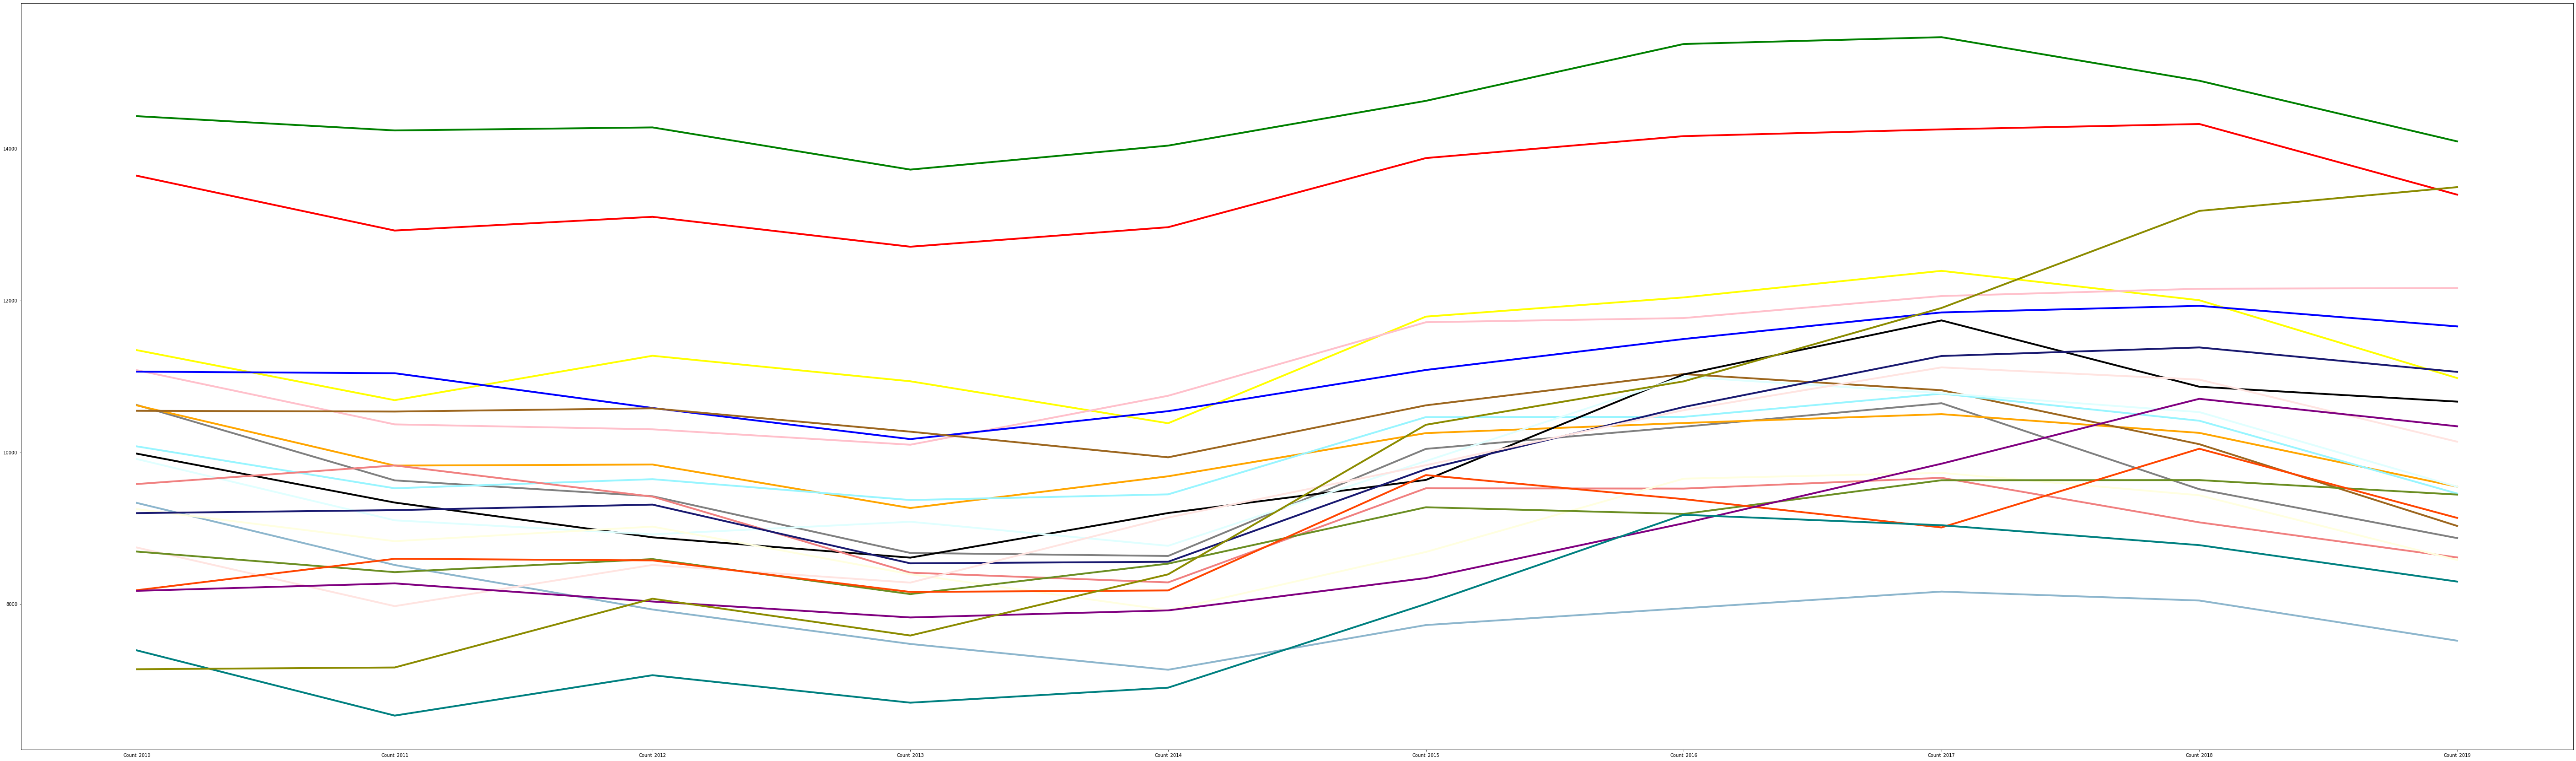

In [88]:
crime_data = df_merge_col.set_index("Area")
years = crime_data.keys()
plt.figure(figsize=(100,30))
country_one = plt.plot(years, crime_data.loc['77th Street',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="green",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Southwest',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="red",linewidth=4)
country_one = plt.plot(years, crime_data.loc['N Hollywood',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="yellow",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Pacific',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="pink",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Southeast',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="blue",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Devonshire',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="gray",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Northeast',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="orange",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Mission',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#9C661F",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Van Nuys',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#98F5FF",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Newton',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#030303",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Topanga',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#E0FFFF",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Harbor',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#F08080",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Foothill',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#8DB6CD",linewidth=4)
country_one = plt.plot(years, crime_data.loc['West Valley',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#FFFFE0",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Hollywood',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#191970",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Olympic',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#FFE4E1",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Rampart',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#6B8E23",linewidth=4)
country_one = plt.plot(years, crime_data.loc['West LA',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#FF4500",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Wilshire',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#800080",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Hollenbeck',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#008080",linewidth=4)
country_one = plt.plot(years, crime_data.loc['Central',['Count_2010','Count_2011','Count_2012',
                     'Count_2013','Count_2014','Count_2015','Count_2016','Count_2017','Count_2018','Count_2019']], 
                        color="#8B8B00",linewidth=4)
plt.savefig("crime.png")
plt.show()